## Задача 2

In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import random

In [150]:
def describe_ball(points):
    assert len(points.shape) == 2
    centre = cp.Variable((1, points.shape[1]))
    problem = cp.Problem(cp.Minimize(
        cp.max(cp.sum((points - centre)**2, axis=1))
    ))
    problem.solve()
    return centre.value, np.sqrt(problem.value)

In [106]:
def get_coords(points, dim):
    return tuple([point[i] for point in points] for i in range(dim))

In [283]:
def generate_points(cnt=100, dim=2):
    points = []
    for i in range(cnt):
        point = [random.uniform(-5, 5) for _ in range(dim)]
        points.append(point)
    return np.array(points)

### Тестируем для 2d

In [284]:
def plot_2d(centre, radius, points):
    fig = plt.figure(figsize=(7, 7))
    ax = plt.gca()
    ax.cla()
    ax.set_xlim((-7, 7))
    ax.set_ylim((-7, 7))
    ax.set_title('Минимальный шар в 2D по точкам')

    plt.scatter(*get_coords(points, 2), color='red')

    circle = plt.Circle(centre, radius, alpha=0.2, linestyle='--', edgecolor='red')
    ax.add_patch(circle)
    plt.grid(True)
    plt.show()
    
def test_2d(points_cnt=100):
    points_2d = generate_points(points_cnt, dim=2)
    centre, radius = describe_ball(points_2d)
    centre = tuple(centre[0])
    plot_2d(centre, radius, points_2d)

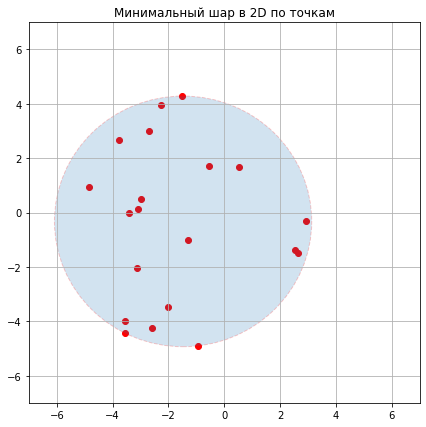

In [286]:
test_2d(20)

### Тестируем для 3d

In [291]:
from mpl_toolkits.mplot3d import Axes3D

def xyz_sphere(centre=[0.,0.,0.], radius=1.,
                    n_meridians=20, n_circles_latitude=None):
    if n_circles_latitude is None:
        n_circles_latitude = max(n_meridians / 2, 4)

    u, v = np.mgrid[0:2 * np.pi:n_meridians * 1j, 0:np.pi:n_circles_latitude * 1j]
    sphere_x = centre[0] + radius * np.cos(u) * np.sin(v)
    sphere_y = centre[1] + radius * np.sin(u) * np.sin(v)
    sphere_z = centre[2] + radius * np.cos(v)
    return sphere_x, sphere_y, sphere_z


In [295]:
def plot_3d(centre, radius, points):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    ax.set_title('Минимальный шар в 3D по точкам')

    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    ax.set_zlim((-5, 5))

    ax.plot_wireframe(*xyz_sphere(centre, radius), alpha=0.5)
    ax.scatter(*get_coords(points, 3), color='red')

def test_3d(points_cnt=100):
    points_3d = generate_points(points_cnt, dim=3)
    centre, radius = describe_ball(points_3d)
    centre = tuple(centre[0])
    plot_3d(centre, radius, points_3d)


/var/folders/n7/k2zyw7490b97hfmqkg39c6080000gn/T/ipykernel_25546/4015631729.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


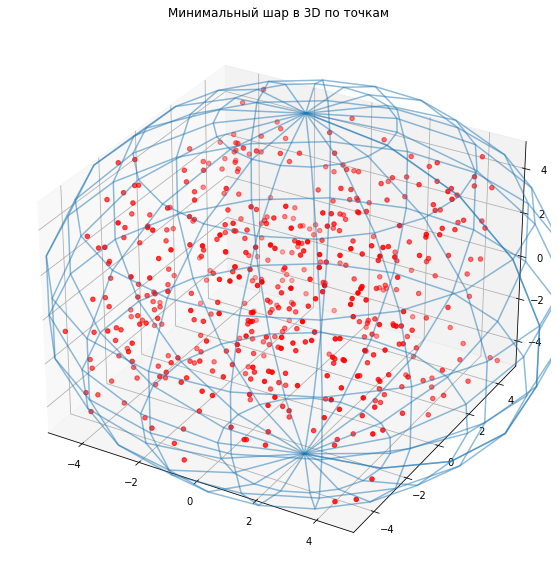

In [296]:
test_3d(500)

### Тестируем для 4D 

🤡

## Задача 3

In [21]:
def svm(xs, ys):
    assert len(xs.shape) == 2
    a = cp.Variable((1, xs.shape[1]))

    x_1 = xs[ys == 1]
    x_0 = xs[ys == 0]

    min_ = cp.Variable(1)
    max_ = cp.Variable(1)

    constr = [
        x_0 @ a.T <= max_,
        min_ <= x_1 @ a.T,
        cp.sum_squares(a) <= 1 
    ] 

    prob = cp.Problem(
        cp.Maximize(min_ - max_),
        constr
    )
    prob.solve()
    return a.value, prob.value

In [23]:
svm(
  np.array([[0, 0], [10, 10], [1, 2], [4, 5]]),
 np.array([0, 1, 0, 1])   
)

(array([[0.70710583, 0.70710774]]), 4.242640688469553)